# Project 3: Web APIs & NLP

## Notebook #5: 
## Classification Model - Naive Bayes Models (Count Vectorizer + TFIDF Vectorizer)

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

In [2]:
submissions = pd.read_csv('./data/submissions_model.csv').drop('Unnamed: 0', axis=1)

In [3]:
submissions.head()

,author,text,created,subreddit,text_tokenized,text_lemmatized,sentiment,sentiment_compound
0,jeremyparnaby,Grealish should be joining within the week: Ka...,2021-07-24 22:34:33,1,"['Grealish', 'should', 'be', 'joining', 'withi...","['Grealish', 'should', 'be', 'joining', 'withi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,UneducatedSlob,How many of them can you name?:,2021-07-24 18:58:06,1,"['How', 'many', 'of', 'them', 'can', 'you', 'n...","['How', 'many', 'of', 'them', 'can', 'you', 'n...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,_conjohn,"Awww shit, here we go again: [Nick Harris] Whe...",2021-07-24 18:34:04,1,"['Awww', 'shit', 'here', 'we', 'go', 'again', ...","['Awww', 'shit', 'here', 'we', 'go', 'again', ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,AutoModerator,[Daily Discussion] Saturday 24 July 2021: This...,2021-07-24 17:00:14,1,"['Daily', 'Discussion', 'Saturday', '24', 'Jul...","['Daily', 'Discussion', 'Saturday', '24', 'Jul...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,tquad24,On this day 10 years ago:,2021-07-24 14:49:55,1,"['On', 'this', 'day', '10', 'years', 'ago']","['On', 'this', 'day', '10', 'years', 'ago']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [4]:
X = submissions['text_lemmatized'].str.replace('City', '')
X = submissions['text_lemmatized'].str.replace('city', '')
X = submissions['text_lemmatized'].str.replace('United', '')
X = submissions['text_lemmatized'].str.replace('united', '')
X = submissions['text_lemmatized'].str.replace('utd', '')

y = submissions['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [6]:
pipe_1 = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', BernoulliNB())
])

In [7]:
pipe_params_1 = {
    'cvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'cvec__min_df'      :[2,3],
    'cvec__max_df'      :[.9, .95],
    'cvec__ngram_range' :[(1,1),(1,2)]
}

In [8]:
# Instantiate GridSearchCV.
gs_1 = GridSearchCV(pipe_1, param_grid=pipe_params_1, cv=5)

In [9]:
# Fit GridSearch to training data.
gs_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [10]:
# Score model on training set.
gs_1.score(X_train, y_train)

0.8752612591024668

In [11]:
# Score model on testing set.
gs_1.score(X_test, y_test)

0.8687647270258397

In [12]:
# Get predictions
preds_1 = gs_1.predict(X_train)

# Save confusion matrix values
cm_1 = confusion_matrix(y_train, preds_1)
tn_1, fp_1, fn_1, tp_1 = cm_1.ravel()

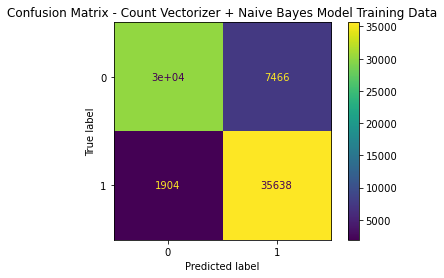

In [13]:
# View confusion matrix

ConfusionMatrixDisplay(cm_1).plot();
plt.title('Confusion Matrix - Count Vectorizer + Naive Bayes Model Training Data');

In [14]:
# Get predictions
preds_2 = gs_1.predict(X_test)

# Save confusion matrix values
cm_2 = confusion_matrix(y_test, preds_2)
tn, fp, fn, tp = cm_2.ravel()

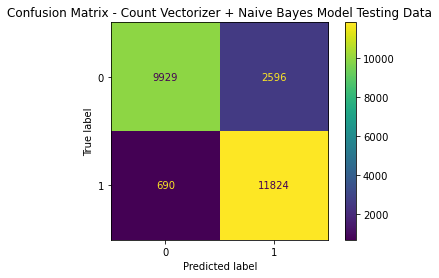

In [15]:
# View confusion matrix

ConfusionMatrixDisplay(cm_2).plot();
plt.title('Confusion Matrix - Count Vectorizer + Naive Bayes Model Testing Data');

In [31]:
# Accuracy
accuracy = (tp + tn) / (tn + fp + fn + tp)

# What is the test specificity of our model?
spec = tn / (tn + fp)

#Sensitivity
sens = tp / (tp + fn)

# By hand
prec = tp / (tp + fp)

In [32]:
accuracy

0.8687647270258397

In [33]:
spec

0.7927345309381237

In [34]:
sens

0.9448617548345852

In [35]:
prec

0.8199722607489598

In [16]:
pipe_2 = Pipeline([
    ('tvec', TfidfVectorizer(stop_words='english')),
    ('nb', BernoulliNB())
])

In [17]:
pipe_params_2 = {
    'tvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'tvec__min_df'      :[2,3],
    'tvec__max_df'      :[.9, .95],
    'tvec__ngram_range' :[(1,1),(1,2)]
}

In [18]:
# Instantiate GridSearchCV.
gs_2 = GridSearchCV(pipe_2, param_grid=pipe_params_2, cv=5)

In [19]:
# Fit GridSearch to training data.
gs_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec',
                                        TfidfVectorizer(stop_words='english')),
                                       ('nb', BernoulliNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [20]:
# Score model on training set.
gs_2.score(X_train, y_train)

0.8752612591024668

In [21]:
# Score model on testing set.
gs_2.score(X_test, y_test)

0.8687647270258397

In [22]:
# Get predictions
preds_3 = gs_2.predict(X_train)

# Save confusion matrix values
cm_3 = confusion_matrix(y_train, preds_3)
tn_3, fp_3, fn_3, tp_3 = cm_3.ravel()

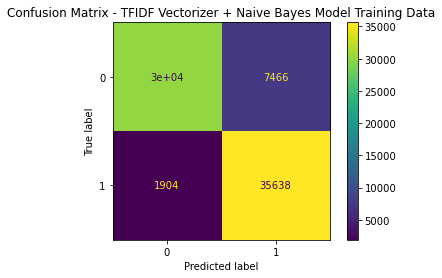

In [23]:
# View confusion matrix

ConfusionMatrixDisplay(cm_3).plot();
plt.title('Confusion Matrix - TFIDF Vectorizer + Naive Bayes Model Training Data');

In [24]:
# Get predictions
preds_4 = gs_2.predict(X_test)

# Save confusion matrix values
cm_4 = confusion_matrix(y_test, preds_4)
tn_4, fp_4, fn_4, tp_4 = cm_4.ravel()

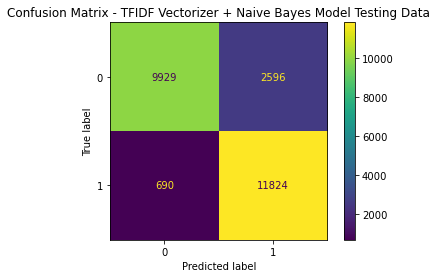

In [25]:
# View confusion matrix

ConfusionMatrixDisplay(cm_4).plot();
plt.title('Confusion Matrix - TFIDF Vectorizer + Naive Bayes Model Testing Data');

In [26]:
# Accuracy
accuracy = (tp_4 + tn_4) / (tn_4 + fp_4 + fn_4 + tp_4)

# What is the test specificity of our model?
spec = tn_4 / (tn_4 + fp_4)

#Sensitivity
sens = tp_4 / (tp_4 + fn_4)

# By hand
prec = tp_4 / (tp_4 + fp_4)

In [27]:
accuracy

0.8687647270258397

In [28]:
spec

0.7927345309381237

In [29]:
sens

0.9448617548345852

In [30]:
prec

0.8199722607489598